In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
!pip install --upgrade category_encoders

In [2]:
data_train =pd.read_csv('SalaryData_Train.csv')
data_test =pd.read_csv('SalaryData_Test.csv')

In [3]:
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#Doing EDA On Train And Test Dataset
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
data_test.shape

(15060, 14)

In [8]:
data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
data_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
data_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


(-1.118516751227488, 1.1008817500584518, -1.104735692620283, 1.11964958117042)

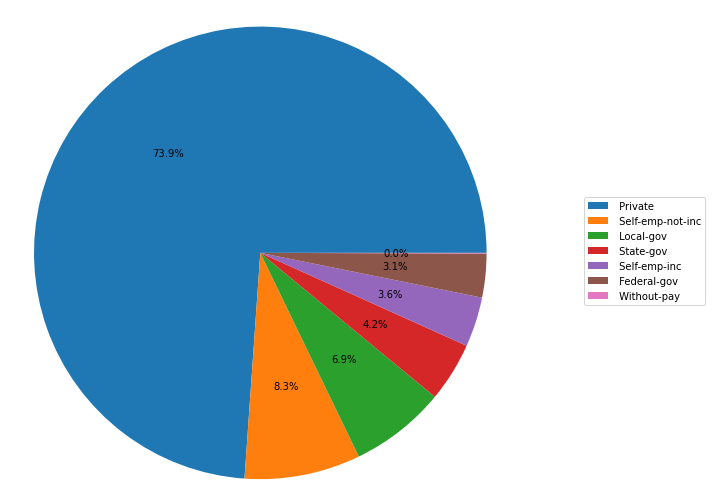

In [11]:
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
no_of_emp = data_train["workclass"].value_counts()
labels = no_of_emp.index
sizes = no_of_emp.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")

(-1.1161675482967917,
 1.1007698832522281,
 -1.1048516099509424,
 1.1188100514005006)

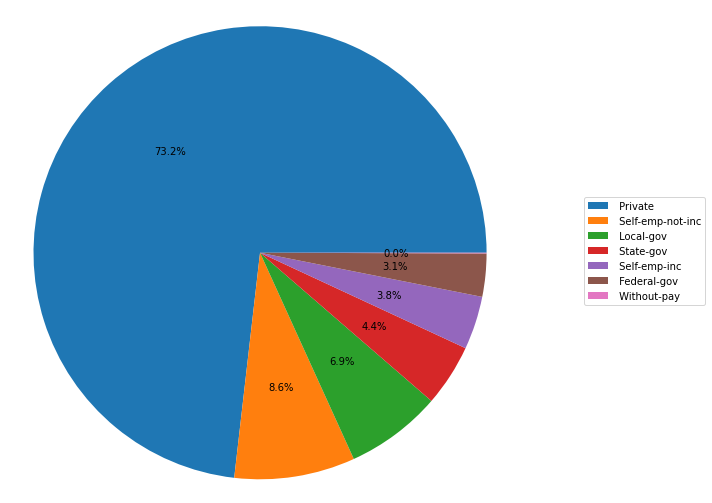

In [12]:
#For Test Data pie chart
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_emp = data_test["workclass"].value_counts()
labels = number_of_emp.index
sizes = number_of_emp.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")

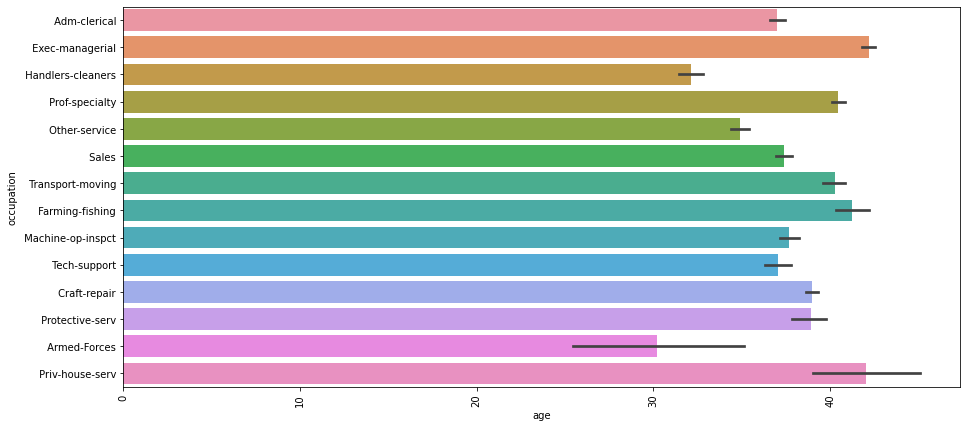

In [13]:
# Identifing the Occupatin BAsed on age using bar plot
#Train data set
plt.figure(figsize=(15,7))
sns.barplot(x = data_train['age'],y = data_train['occupation'])
plt.xticks(rotation = 'vertical')
plt.show()


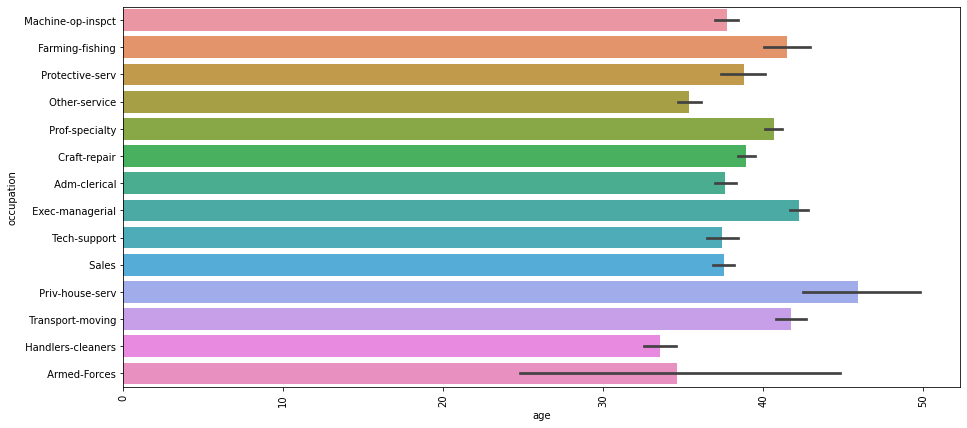

In [14]:
# Identifing the Occupatin Based on age using bar plot
#Test data set
plt.figure(figsize=(15,7))
sns.barplot(x = data_test['age'],y = data_test['occupation'])
plt.xticks(rotation = 'vertical')
plt.show()
     

<AxesSubplot:>

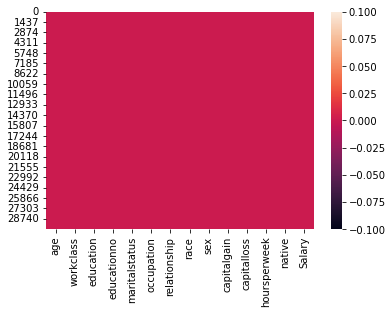

In [15]:
#Train Dataset
import seaborn as sns
sns.heatmap(data_train.isnull())

<AxesSubplot:>

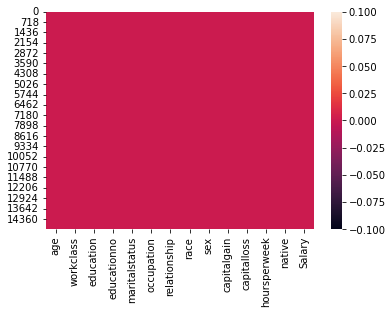

In [16]:
#TestDataset
import seaborn as sns
sns.heatmap(data_test.isnull())     

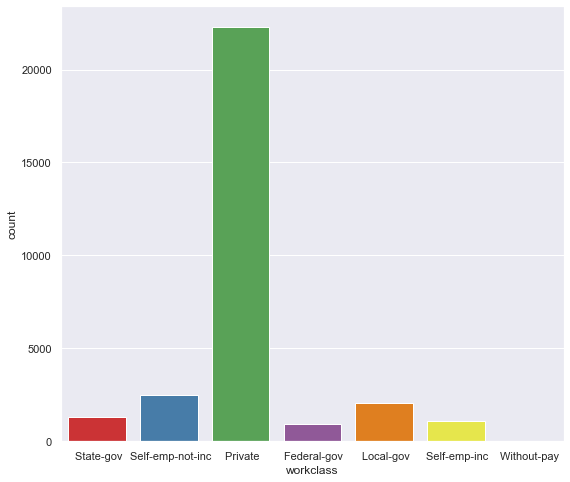

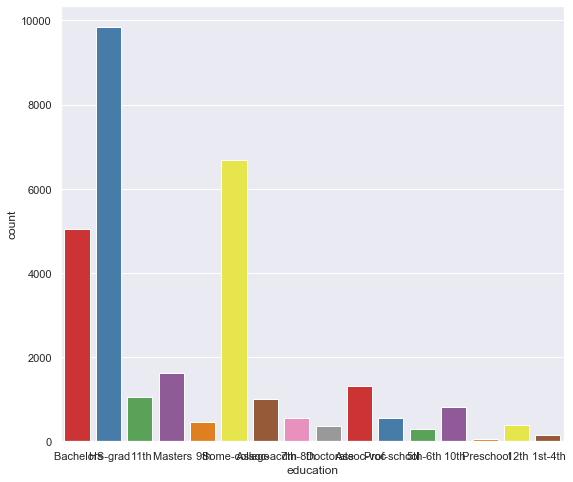

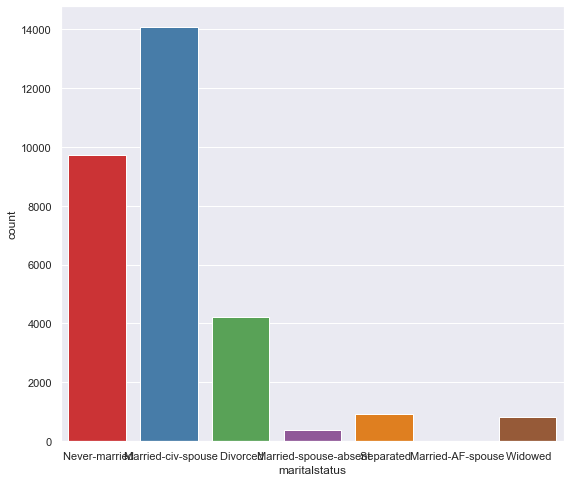

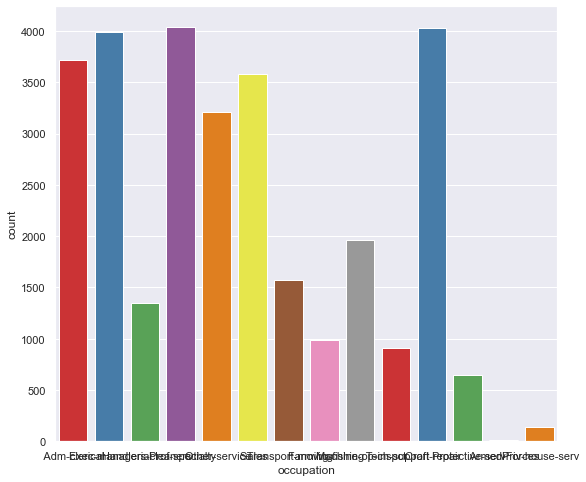

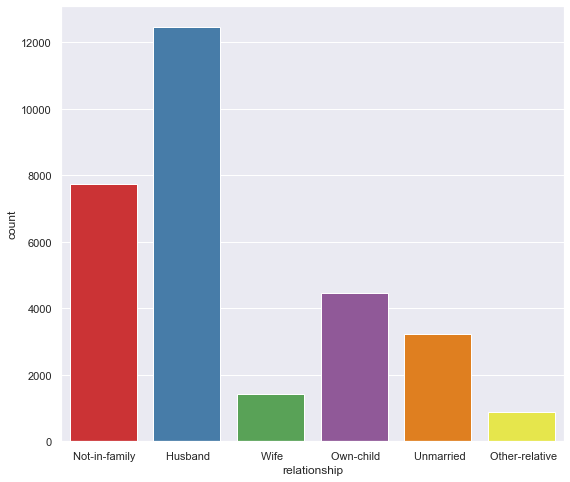

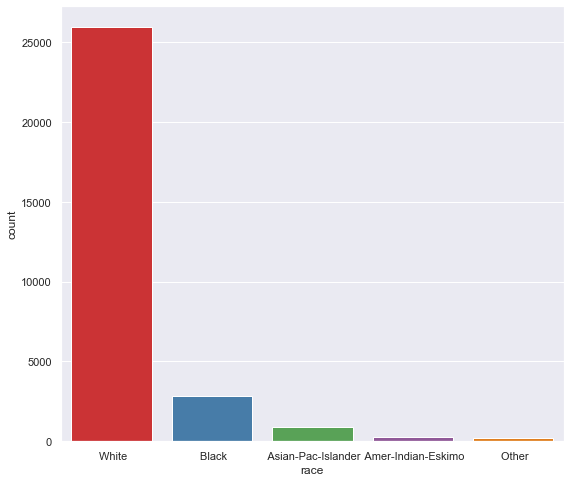

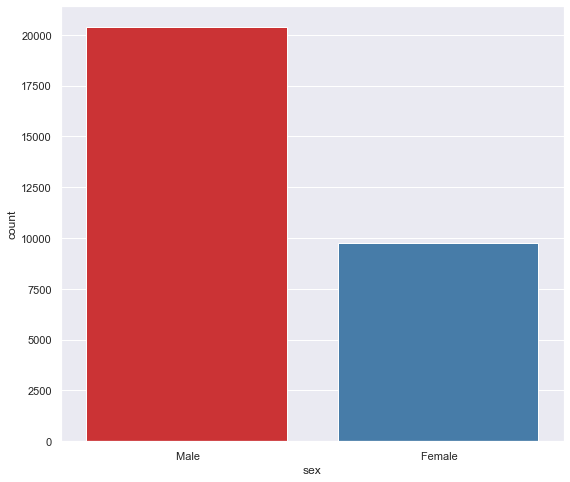

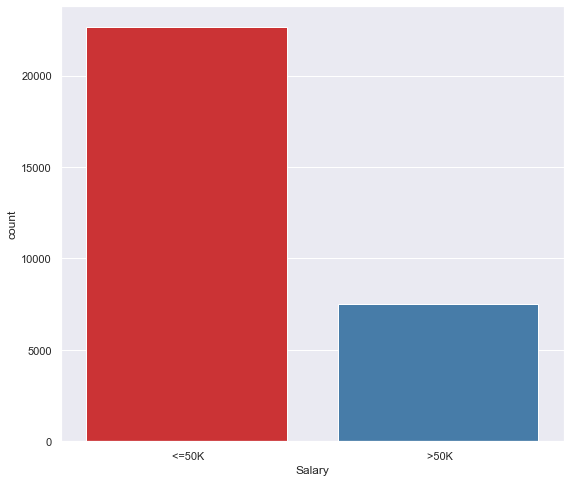

In [17]:
#Counting For All colums
# countplot for all categorical columns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(9,8)})
str_column = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in str_column:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = data_train, palette = 'Set1');

In [18]:
# Concatinate 2 dataset
data_con = pd.concat([data_train,data_test], axis = 0).reset_index(drop = True)
data_con.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot:>

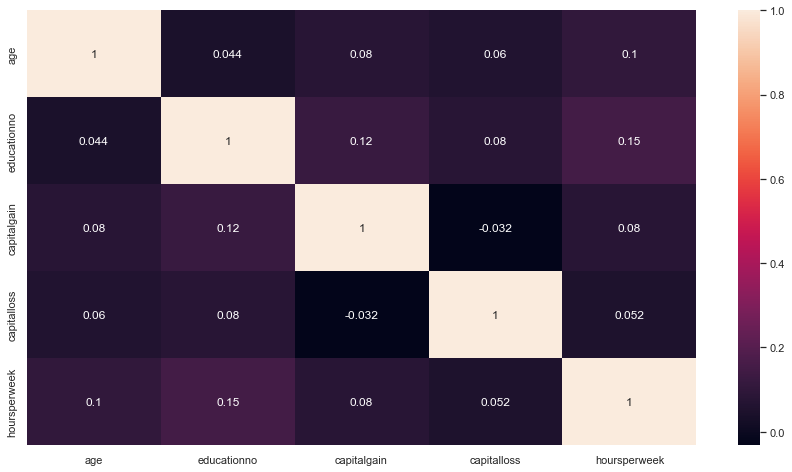

In [19]:
plt.figure(figsize=(15,8))  # Heatmap of Correlation between data
sns.heatmap(data_train.corr(),annot=True)

<AxesSubplot:>

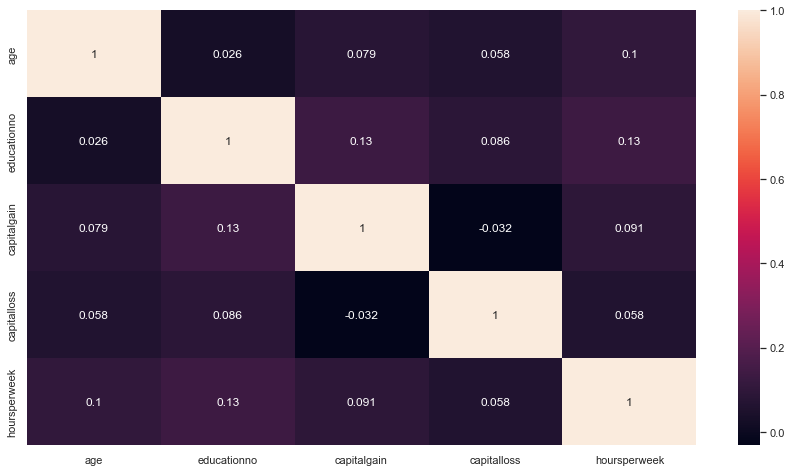

In [20]:
plt.figure(figsize=(15,8))       # Heatmap of Correlation between data
sns.heatmap(data_test.corr(),annot=True)

In [21]:
X = data_train.drop(['Salary'], axis=1)
y = data_train['Salary']

In [22]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X, y, test_size = 0.3, random_state = 0)
     

In [23]:
# check the shape of X_train and X_test
X_train_data.shape, X_test_data.shape

((21112, 13), (9049, 13))

In [25]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship','race', 'sex', 'native']) 
                                 

In [26]:
X_train_data = encoder.fit_transform(X_train_data)
X_test_data = encoder.transform(X_test_data)

In [27]:
X_train_data.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X_test_data.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
25338,21,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18840,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8391,56,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18258,43,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16669,53,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
X_train_data.shape

(21112, 102)

In [30]:
X_test_data.shape

(9049, 102)

In [31]:
#Model training

In [32]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train_data, y_train_data)

GaussianNB()

In [33]:
#Predicted Result
y_pred = gnb.predict(X_train_data)
y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [37]:
#Checking accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score of train dataset:{0:0.4f}'. format(accuracy_score(y_train_data, y_pred)))

Model accuracy score of train dataset:0.8045


In [38]:
# train a Gaussian Naive Bayes classifier on the testdata set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_test_data, y_test_data)

GaussianNB()

In [39]:
#Predicted Result
y_pred_test = gnb.predict(X_test_data)
y_pred_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [40]:
#Checking accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score of test dataset: {0:0.4f}'. format(accuracy_score(y_test_data, y_pred_test)))

Model accuracy score of test dataset: 0.8010


In [41]:
#Confusion matrix
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_data, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
     

Confusion matrix

 [[5430 1368]
 [ 433 1818]]

True Positives(TP) =  5430

True Negatives(TN) =  1818

False Positives(FP) =  1368

False Negatives(FN) =  433


<AxesSubplot:>

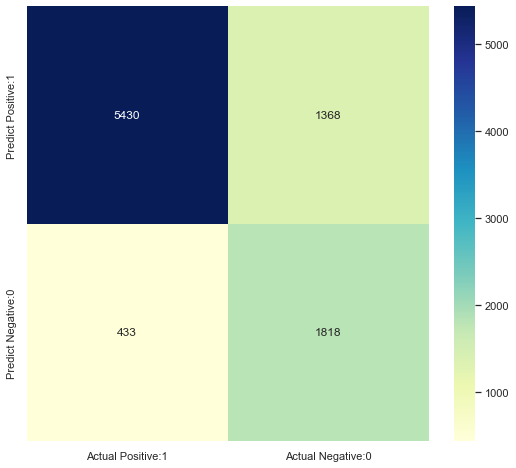

In [42]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [43]:
# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X_train_data, y_train_data, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.8186553  0.80160985 0.79535765 0.81430602 0.80625296 0.79156798
 0.81241118 0.79535765 0.79725249 0.81051634]


In [44]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [45]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8010


In [46]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1990


In [47]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7988


In [48]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9261


In [49]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9261


In [50]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4294


In [51]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9261


In [52]:
gnb.predict_proba(X_test_data)

array([[9.99984198e-01, 1.58015078e-05],
       [9.99102652e-01, 8.97347782e-04],
       [8.05184548e-01, 1.94815452e-01],
       ...,
       [9.99999997e-01, 3.15783544e-09],
       [9.99998636e-01, 1.36362500e-06],
       [4.02034036e-01, 5.97965964e-01]])

In [53]:
gnb.predict_proba(X_train_data)

array([[4.52038984e-03, 9.95479610e-01],
       [1.00000000e+00, 4.41288964e-10],
       [9.99944249e-01, 5.57508567e-05],
       ...,
       [9.60995302e-01, 3.90046978e-02],
       [1.85893212e-04, 9.99814107e-01],
       [2.75865442e-01, 7.24134558e-01]])

In [54]:
X_test_data.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
25338,21,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18840,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8391,56,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18258,43,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16669,53,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
X_train_data.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Cross-validation scores:[0.8186553  0.80160985 0.79535765 0.81430602 0.80625296 0.79156798
 0.81241118 0.79535765 0.79725249 0.81051634]
    Accuracy Score of Train data set is 
    Accuracy Score of Test data set is: